# Chapter 7 行列の例

## 7.1 幾何変換

回転行列を作り，点の集合を$\pi/3$ラジアン（60${}^\circ$）だけ回転してみよう．結果を図7.1に示す．

In [2]:
Rot(theta) = [cos(theta) -sin(theta); 
              sin(theta) cos(theta)];
R = Rot(pi / 3)

2×2 Array{Float64,2}:
 0.5       -0.866025
 0.866025   0.5     

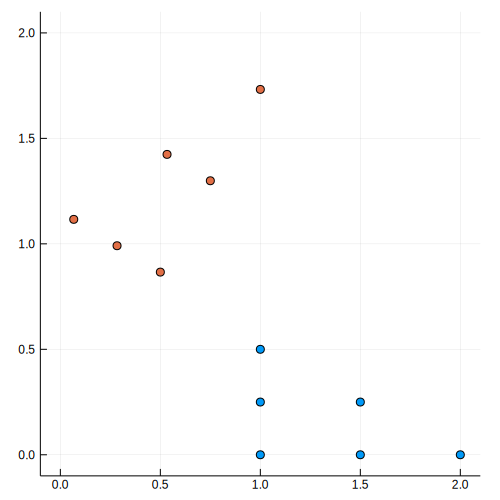

In [4]:
# 2次元点のリストを作成
points = [ [1, 0], [1.5, 0], [2, 0], [1, 0.25], [1.5, 0.25], [1, .5] ];
# 回転する
rpoints = [ R*p for p in points ];
# 2つの点集合をプロット
using Plots
scatter([c[1] for c in points], [c[2] for c in points])
scatter!([c[1] for c in rpoints], [c[2] for c in rpoints])
plot!(lims = (-0.1, 2.1), size = (500, 500), legend = false)

![図7.1](fig7-1.pdf)

図7.1 6個の点を60度回転した結果


## 7.2 要素選択行列

### 逆順行列

逆順行列を作るには，単位行列の列を逆順に並べればよい．そのためにJuliaのコマンド`reverse`が使える．（`reverse(A,dims=1)`は行列の行を逆順にする．`reverse(A,dims=2)`は列を逆順にする）．ベクトルを逆順行列にかけると，行列の要素が逆順になる．


In [5]:
using VMLS

In [7]:
reverser(n) = reverse(eye(n), dims=1)

reverser (generic function with 1 method)

In [8]:
A = reverser(5)

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [9]:
x = [1., 2., 3., 4., 5.];
A * x  # xをAにかけて逆順にする

5-element Array{Float64,1}:
 5.0
 4.0
 3.0
 2.0
 1.0

In [10]:
reverse(x)  # xをreverseで逆順にする

5-element Array{Float64,1}:
 5.0
 4.0
 3.0
 2.0
 1.0

### 置換行列

置換行列を作り，行列の要素を入れ替えよう．Juliaでは，置換したインデックスをベクトルに渡せば置換できるので，このような行列を作って置換する必要性はない．


In [11]:
A = [0 0 1; 1 0 0; 0 1 0]

3×3 Array{Int64,2}:
 0  0  1
 1  0  0
 0  1  0

In [12]:
x = [0.2, -1.7, 2.4]

3-element Array{Float64,1}:
  0.2
 -1.7
  2.4

In [13]:
A * x  # xを置換して[x[3], x[1], x[2]]にする

3-element Array{Float64,1}:
  2.4
  0.2
 -1.7

In [14]:
x[[3, 1, 2]]  # 置換したインデックスで置換

3-element Array{Float64,1}:
  2.4
  0.2
 -1.7

## 接続行列

### グラフの接続行列

本書図7.3のネットワークの接続行列を作成する．


In [15]:
A = [ -1 -1 0 1 0; 1 0 -1 0 0 ; 0 0 1 -1 -1 ; 0 1 0 0 1]

4×5 Array{Int64,2}:
 -1  -1   0   1   0
  1   0  -1   0   0
  0   0   1  -1  -1
  0   1   0   0   1

In [16]:
xcirc = [1, -1, 1, 0, 1] # 循環フロー

5-element Array{Int64,1}:
  1
 -1
  1
  0
  1

In [17]:
A * xcirc

4-element Array{Int64,1}:
 0
 0
 0
 0

In [20]:
s = [1, 0, -1, 0];  # ソースベクトル
x = [0.6, 0.3, 0.6, -0.1, -0.3];  # フローベクトル

In [22]:
A * x + s   # 各ノードへ出入りするフロー

4-element Array{Float64,1}:
 1.1102230246251565e-16
 0.0                   
 0.0                   
 0.0                   

### ディリクレエネルギー

本書＊＊ページでは，本書の図7.2のグラフに関連する？？？2つのポテンシャルベクトルのディリクレエネルギーを計算する．


In [23]:
A = [ -1 -1 0 1 0 ; 1 0 -1 0 0 ; 0 0 1 -1 -1; 0 1 0 0 1 ]

4×5 Array{Int64,2}:
 -1  -1   0   1   0
  1   0  -1   0   0
  0   0   1  -1  -1
  0   1   0   0   1

In [24]:
vsmooth = [ 1, 2, 2, 1 ]

4-element Array{Int64,1}:
 1
 2
 2
 1

In [25]:
using LinearAlgebra

In [26]:
norm(A' * vsmooth)^2 # vsmoothのディリクレエネルギー

2.9999999999999996

In [27]:
vrough = [ 1, -1, 2, -1 ];

In [28]:
norm(A' * vrough)^2 # vroughのディリクレエネルギー

27.0

## 7.4 畳み込み

Juliaの`DSP`パッケージには畳み込み関数`conv`が含まれている．このパッケージを追加すると，ベクトル`a`と`b`の畳み込みを計算するコマンド`conv(a,b)`が使えるようになる．これを使って，以下の多項式の係数を求めよう．

$$
p(x) = (1+x)(2-x+x^2)(1+x-2x^2) = 2 + 3x - 3x^2 - x^3 + x^4 - 2x^5
$$

In [29]:
using DSP

┌ Info: Recompiling stale cache file /Users/tamaki/.julia/compiled/v1.0/DSP/OtML7.ji for DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1190


In [30]:
a = [1, 1];  # 1+xの係数
b = [2, -1, 1];  # 2-x+x^2の係数
c = [1, 1, -2];  # 1+x-2x^2の係数

In [31]:
d = conv(conv(a, b), c)  # 積の係数

6-element Array{Int64,1}:
  2
  3
 -3
 -1
  1
 -2

テプリッツ行列を生成する関数を作り，`conv`関数をチェックしてみよう．Juliaの畳み込み関数の実装が非常に効率的であることも分かるはずである．

本書の式(7.3）のテプリッツ行列$T(b)$を作るには，まず次元$((n+m-1) \times n)$のゼロ行列を作成し，係数$b_i$を一つずつ加えていく．この場合，単一インデックス指定を使うと便利である．行列$T(b)$内の要素$b_i$の単一インデックスは$i, i+m, i+2(m+n), \ldots, i + (n-1)(m+n)$である．

In [32]:
function toeplitz(b,n)
m = length(b)
T = zeros(n+m-1,n)
for i=1:m
   T[i : n+m : end] .= b[i]
end
return T
end

toeplitz (generic function with 1 method)

In [35]:
b = [-1, 2, 3];
a = [-2, 3, -1, 1];
Tb = toeplitz(b, length(a))

6×4 Array{Float64,2}:
 -1.0   0.0   0.0   0.0
  2.0  -1.0   0.0   0.0
  3.0   2.0  -1.0   0.0
  0.0   3.0   2.0  -1.0
  0.0   0.0   3.0   2.0
  0.0   0.0   0.0   3.0

In [36]:
Tb * a, conv(b, a)

([2.0, -7.0, 1.0, 6.0, -1.0, 3.0], [2, -7, 1, 6, -1, 3])

In [37]:
m = 2000;
n = 2000;
a = randn(m);
b = randn(n); 

In [38]:
@time ctoep = toeplitz(b, n) * a;

  0.206110 seconds (71.20 k allocations: 64.652 MiB, 32.01% gc time)


In [39]:
@time ctoep = toeplitz(b, n) * a;

  0.211845 seconds (6.01 k allocations: 61.325 MiB, 63.60% gc time)


In [40]:
@time cconv = conv(a, b);

  0.025972 seconds (165 allocations: 134.281 KiB)


In [41]:
@time cconv = conv(a, b);

  0.000733 seconds (149 allocations: 133.344 KiB)


In [42]:
norm(ctoep - cconv)

1.5725546488654934e-12